<a href="https://colab.research.google.com/github/joaquincdlg/challenge1-data-science-latam/blob/main/alurastorelatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



##**Ingreso total por cada tienda**

<Axes: title={'center': 'Total de Ventas por Tienda'}, xlabel='Tienda'>

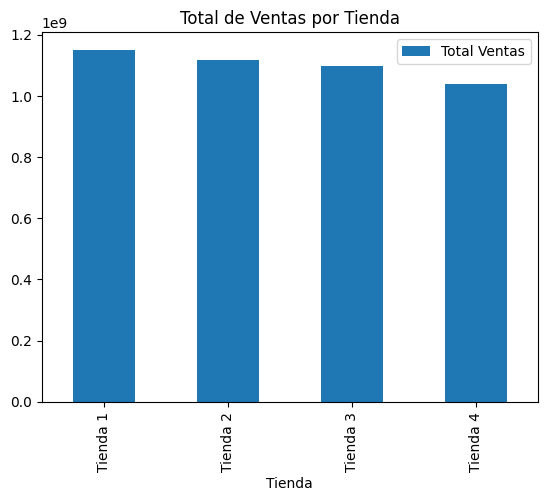

In [3]:
ventas=tienda["Precio"].sum()
ventas2=tienda2["Precio"].sum()
ventas3=tienda3["Precio"].sum()
ventas4=tienda4["Precio"].sum()

#No se puede graficar directamente porque son 4 DF distintos, por eso los agrupo en 1

ventas_totales = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Total Ventas': [ventas, ventas2, ventas3, ventas4]
})
ventas_totales.plot(x='Tienda', y='Total Ventas', kind='bar', title='Total de Ventas por Tienda')


# 2. Ventas por categoría

<Axes: title={'center': 'Cantidad de Productos por Categoría'}, xlabel='Categoría del Producto'>

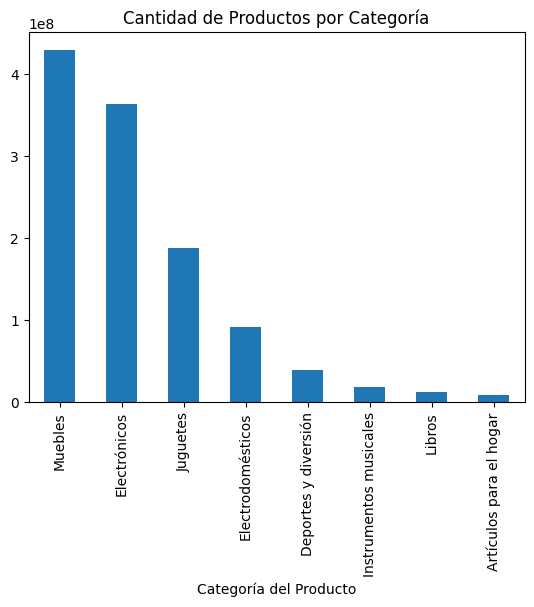

In [16]:
venta_por_categoria=tienda.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)

venta_por_categoria.plot(kind="bar", title="Ventas por Categoría")



<Axes: title={'center': 'Cantidad de Productos por Categoría'}, xlabel='Categoría del Producto'>

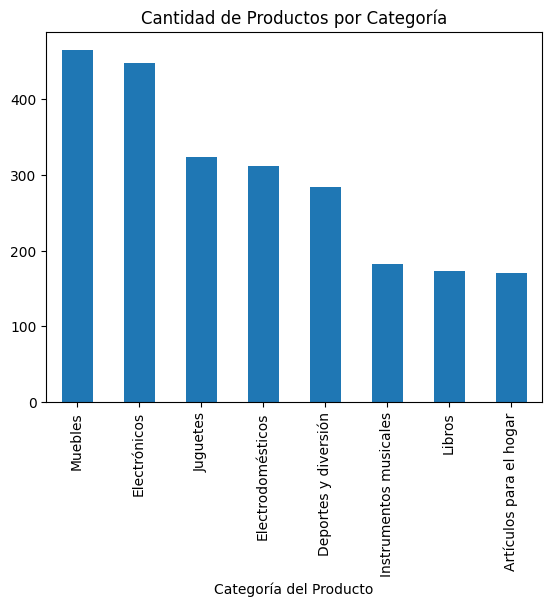

In [17]:
cantidad_categoria=tienda.value_counts("Categoría del Producto")
cantidad_categoria.plot(kind="bar", title="Cantidad de Productos por Categoría")

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda